<a href="https://colab.research.google.com/github/abinarain/MatrixDecompositionForDataScience/blob/main/MDAEx3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Name: Abhishek N. Singh
#Course: Matrix Decomposition for Data Analysis
#Entry No.: 322079
#

In [ ]:
from util import *
#from utils import * #Note this is not needed
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
import time

In [ ]:
#!pip install utils #This is not needed

In [ ]:
#Task 1: Matrix completion for movie ratings
#Download the data and code stub files from course’s Moodle page. Among the files, there are three
#that we use in this task: ratings.csv, ratings_validation.csv, and movies.txt. This data is a sample
#movie ratings data from GroupLens Research.1
#It contains ratings (in 0 to 5 starts scale) of 9724 movies by
#610 users. Most of these ratings are in ratings.csv. The last rating (by timestamp) of every user is separated
#in the ratings_validation.csv file. We use this to evaluate how good our prediction of the ratings is.2
#Do not use the validation data to train your model! The final file, movies.txt, contains the names of the
#movies in the same order as they appear in the data (i.e. the first movie name corresponds to movie number
#1, etc.).
#First, load the data and normalize the ratings so that they’re first in scale from 1 to 6 stars and then divide
#them by 6 so that the final ratings are in interval (0, 1]. We will use 0 to denote a missing rating, so that we
#can use standard sparse matrix storage formats.
#The code stub contains an implementation of an SGD algorithm. For this and the next task you must use
#this implementation so that the results are comparable. The code can be slow, so reserve enough time to
#complete these tasks!
#Now, get some basic idea how SGD algorithm works: run the provided SGD algorithm with this data
#using learning rate 0.001 and 100 epochs and no regularization, and observe how the error behaves during
#epochs. Plot errors over epochs. Has the algorithm converged in 100 epochs? Argue!
#The algorithm does not do early stopping if the change between two consecutive epochs is small enough.
#Would this make sense for an SGD algorithm? Why or why not?
#You can also print the top-10 and bottom-10 movies per factor. Can you identify any movies or any
#patterns? Include some examples in your report (but not all).
#In the previous run you used a fixed learning rate. A common heuristic to set dynamic learning rate is
#the so-called bold driver heuristic. In bold driver heuristic, we increase the learning rate as long as the error
#decreases over epochs. If the error increases, we drop the learning rate back to the base learning rate. The
#provided function implements the bold driver heuristic with parameter bold_driver which is multiplied
#with the learning rate when error decreases.3 Run SGD again, this time with learning rate 0.0001 and bold
#driver multiplier of 2. How does the behaviour change? Do you get better results? How is the convergence?
#Now, try around different step sizes, bold driver multipliers, and epoch numbers. Try only few different
#values so that this part doesn’t take too long; we will return to this topic in the next assignment. Can you
#converge to (essentially) equally good training results with smaller number of epochs? How does that change
#the validation error?
#Next, we will work with biases. Start by running SGD with learning rate 0.0001 and bold driver multiplier
#2 but computing only the global, user, and movie bias. Hence, the prediction of a rating for movie j by user
#i is µ + b
#user
#i + b
#movie
#j
#, where µ is the average rating. How are the results? Why? Argue!


In [ ]:
#Now, using the same settings, compute both the factor matrices and the bias terms. Now the predicted
#rating for element (i, j) becomes
#µ + b
#user
#i + b
#movie
#j + li
#· rj = µ + b
#user
#i + b
#movie
#j + (LRT
#)ij ,
#where li
#is the ith row of left-hand factor matrix L and rj
#is the jth row or right-hand factor matrix R (here,
#R is transposed). Are the results better? Also print the movies with highest and lowest biases. Can you spot
#any patterns here?
#As the final part, we add an L2-regularizer for all terms. The error we now try to minimize is
#∑
#(i,j)∈Ω
#(Di,j − µ − b
#user
#i − b
#movie
#j − li
#· rj)
#2 + λf kLk
#2
#F + λf kRk
#2
#F + λbkb
#userk
#2
#2 + λbkb
#moviek
#2
#2
#,
#where λf and λb are the factor and bias term regularizer constants, respectively (the provided SGD implementation implements these as factor_regu and bias_regu parameters, respectively). Run the code once
#more using regularizer coefficient value 0.001 for both factors and biases. How do the results change? How
#do the validation error results change? Why? Argue!
#Use the parameters (epoch number, step size, and bold driver multiplier) you found earlier together with
#bias terms and regularizers. How are the results now?
#As the final task, compute the SVD of the rating matrix (assuming 0s mean 0s, not missing values) and
#compare the error in observed entries and the validation error.

In [ ]:
tmp = np.genfromtxt('ratings.csv', delimiter=',', dtype='int32')
#Reading the data

In [ ]:
tmp

array([[   1,    1,    4],
       [   1,    2,    4],
       [   1,    3,    4],
       ...,
       [ 610, 9722,    3],
       [ 610, 9723,    3],
       [ 610, 9724,    3]], dtype=int32)

In [ ]:
#Since the rating is on the column number 3 which has column index 2, we modify it
#That is normalization is done between value (0,6]
val = np.array(tmp[:,2]+1, dtype='float')/6

In [ ]:
val

array([0.83333333, 0.83333333, 0.83333333, ..., 0.66666667, 0.66666667,
       0.66666667])

In [ ]:
#coo_matrix((data, (i, j)), [shape=(M, N)])
#to construct from three arrays:
#data[:] the entries of the matrix, in any order

#i[:] the row indices of the matrix entries

#j[:] the column indices of the matrix entries

#Where A[i[k], j[k]] = data[k]. When shape is not specified, it is inferred from the index arrays
#So now the modified data is:
data = coo_matrix( (val, (tmp[:,0]-1, tmp[:,1]-1)) )
# data is 1-indexed, so we need to reduce 1 to get it 0-indexed

In [ ]:
data


<610x9724 sparse matrix of type '<class 'numpy.float64'>'
	with 100226 stored elements in COOrdinate format>

In [ ]:
data.toarray() #This is how we can see the data visually

array([[0.83333333, 0.83333333, 0.83333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.66666667, 0.66666667,
        0.66666667]])

In [ ]:
n = data.get_shape()[0]
m = data.get_shape()[1]
avg = data.sum()/data.count_nonzero()
print(f'Data has {n} rows and {m} columns')
print(f'Average rating is {avg:.4F}')

Data has 610 rows and 9724 columns
Average rating is 0.7249


In [ ]:
#Similarly, we prepare the validation data matrix
tmp = np.genfromtxt('ratings_validation.csv', delimiter=',', dtype='int32')
val = np.array(tmp[:,2]+1, dtype='float')/6
validation = coo_matrix( (val, (tmp[:,0]-1, tmp[:,1]-1)) )

In [ ]:
validation

<610x9341 sparse matrix of type '<class 'numpy.float64'>'
	with 610 stored elements in COOrdinate format>

In [ ]:
#SGD is provided in the additional file util.py which has been uploaded
# Compute just factors
res = sgd(data, 10, factor_learning_rate=0.001, epochs=100, verbose=True ) #factor_learning_rate=None

Epoch   0: error 338471.93	factor_learning rate = 0.001
Epoch   1: error 39478.78	factor_learning rate = 0.001
Epoch   2: error 23672.60	factor_learning rate = 0.001
Epoch   3: error 17358.54	factor_learning rate = 0.001
Epoch   4: error 13961.38	factor_learning rate = 0.001
Epoch   5: error 11830.33	factor_learning rate = 0.001
Epoch   6: error 10366.70	factor_learning rate = 0.001
Epoch   7: error 9295.69	factor_learning rate = 0.001
Epoch   8: error 8472.62	factor_learning rate = 0.001
Epoch   9: error 7824.00	factor_learning rate = 0.001
Epoch  10: error 7294.64	factor_learning rate = 0.001
Epoch  11: error 6851.00	factor_learning rate = 0.001
Epoch  12: error 6479.56	factor_learning rate = 0.001
Epoch  13: error 6159.14	factor_learning rate = 0.001
Epoch  14: error 5877.68	factor_learning rate = 0.001
Epoch  15: error 5629.52	factor_learning rate = 0.001
Epoch  16: error 5413.42	factor_learning rate = 0.001
Epoch  17: error 5216.30	factor_learning rate = 0.001
Epoch  18: error 504

In [ ]:
#We can see by the verbose that the error keeps on decreasing 

In [ ]:
val_err = squared_error(validation, res.L, res.R)
print('Only factors, fixed rate, no regularization')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

Only factors, fixed rate, no regularization
Final training error = 1817.814	Relative error = 0.032481741082324427
    Validation error = 229.815	Relative error = 0.6027504825942747


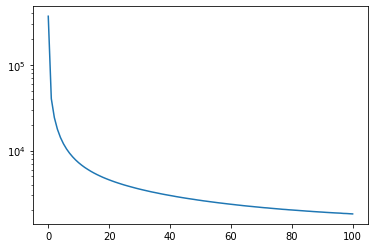

In [ ]:
# Plot errors over epocs
plt.plot(res.err)
plt.gca().set_yscale('log') # log scale makes these plots easier to read
plt.show()
plt.close()

In [ ]:
#This confirms that the error keeps on decreasing as we saw in verbose

In [ ]:
#However, the error has not converged at 100 epochs given that the curve values are still dropping. However,
#we can agree to a convergence value when the difference is very small.

In [ ]:
#The algorithm does not do early stopping if the change between two 
#consecutive epochs is small enough. In stochastic gradient descent
#since the gradient vector is chosen randomly and so it is very much possible
#that the algorithm might not reach at exact global minima. Thus, it would be
#very much sensible to stop at a a minimum difference in consecutive epoch value

In [ ]:
# Read movies
movies = []
with open('movies.txt') as f:
    for row in f:
        movies.append(row.strip())

In [ ]:
# Print the top-10 and bottom-10 movies
print_factors(res.R, movies)

Factor 0 top-10
  1	Dave Chappelle: Equanimity (2017)	0.365
  2	The Lost Room (2006)	0.362
  3	Sex, Drugs & Taxation (2013)	0.362
  4	Haunted World of El Superbeasto, The (2009)	0.357
  5	Walking with Monsters (2005)	0.352
  6	Fist Fight (2017)	0.352
  7	Behind Enemy Lines II: Axis of Evil (2006)	0.350
  8	Sorority House Massacre II (1990)	0.349
  9	Jim Norton: American Degenerate (2013)	0.348
 10	Hideous Kinky (1998)	0.344

Factor 0 bottom-10
  1	Only God Forgives (2013)	-0.226
  2	The Town that Dreaded Sundown (2014)	-0.210
  3	Juwanna Mann (2002)	-0.206
  4	Against the Ropes (2004)	-0.202
  5	Dancemaker (1998)	-0.199
  6	Inferno (2016)	-0.196
  7	Two Much (1995)	-0.196
  8	Vice (2015)	-0.188
  9	May (2002)	-0.181
 10	Alvin and the Chipmunks: Chipwrecked (2011)	-0.180

Factor 1 top-10
  1	The Girl with All the Gifts (2016)	0.354
  2	Dad (1989)	0.352
  3	Get on Up (2014)	0.352
  4	Alles Inklusive (2014)	0.352
  5	Hood of Horror (2006)	0.351
  6	Trinity and Sartana Are Coming (1972)	0.

In [ ]:
#The pattern is that the top movies have score abouve 0.3 while bottom ones have scores
# in negative

In [ ]:
# Compute just factors, but use bold driver and slower learning
res = sgd(data, 10, bold_driver=2, factor_learning_rate=0.0001)

Epoch   0: error 357330.46	factor_learning rate = 0.0001
Epoch   1: error 187113.36	factor_learning rate = 0.0002
Epoch   2: error 103079.76	factor_learning rate = 0.0004
Epoch   3: error 57533.35	factor_learning rate = 0.0008
Epoch   4: error 31933.83	factor_learning rate = 0.0016
Epoch   5: error 17667.60	factor_learning rate = 0.0032
Epoch   6: error 10158.16	factor_learning rate = 0.0064
Epoch   7: error 6500.13	factor_learning rate = 0.01
Epoch   8: error 4993.09	factor_learning rate = 0.01
Epoch   9: error 4095.20	factor_learning rate = 0.01
Epoch  10: error 3539.00	factor_learning rate = 0.01
Epoch  11: error 3194.52	factor_learning rate = 0.01
Epoch  12: error 2829.51	factor_learning rate = 0.01
Epoch  13: error 2647.78	factor_learning rate = 0.01
Epoch  14: error 2415.39	factor_learning rate = 0.01
Epoch  15: error 2328.30	factor_learning rate = 0.01
Epoch  16: error 2207.07	factor_learning rate = 0.01
Epoch  17: error 2073.78	factor_learning rate = 0.01
Epoch  18: error 2004.

In [ ]:
val_err = squared_error(validation, res.L, res.R)
print('Only factors, fixed rate, no regularization')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

Only factors, fixed rate, no regularization
Final training error = 1380.074	Relative error = 0.024659964429735608
    Validation error = 221.044	Relative error = 0.5797447581574955


In [ ]:
#So we see that the validation error has reduced this time with bold driver heuristic

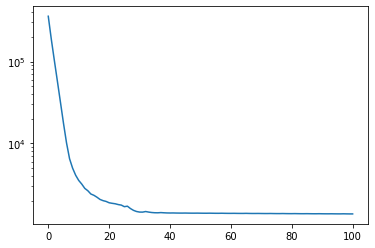

In [ ]:
# Plot errors over epocs
plt.plot(res.err)
plt.gca().set_yscale('log') # log scale makes these plots easier to read
plt.show()
plt.close()

In [ ]:
#The plot above clearly shows that the convergence to a more straight line takes place
#much faster this time

In [ ]:
# Compute just factors, but use bold driver and slower learning
res = sgd(data, 10, bold_driver=3, factor_learning_rate=0.001)

Epoch   0: error 369353.08	factor_learning rate = 0.001
Epoch   1: error 40302.69	factor_learning rate = 0.003
Epoch   2: error 13179.49	factor_learning rate = 0.009000000000000001
Epoch   3: error 6351.39	factor_learning rate = 0.01
Epoch   4: error 4733.64	factor_learning rate = 0.01
Epoch   5: error 3870.27	factor_learning rate = 0.01
Epoch   6: error 3405.10	factor_learning rate = 0.01
Epoch   7: error 3120.09	factor_learning rate = 0.01
Epoch   8: error 2775.50	factor_learning rate = 0.01
Epoch   9: error 2594.32	factor_learning rate = 0.01
Epoch  10: error 2383.94	factor_learning rate = 0.01
Epoch  11: error 2295.65	factor_learning rate = 0.01
Epoch  12: error 2178.82	factor_learning rate = 0.01
Epoch  13: error 2089.16	factor_learning rate = 0.01
Epoch  14: error 1994.68	factor_learning rate = 0.01
Epoch  15: error 1947.49	factor_learning rate = 0.01
Epoch  16: error 1886.04	factor_learning rate = 0.01
Epoch  17: error 1837.38	factor_learning rate = 0.01
Epoch  18: error 1827.31

In [ ]:
val_err = squared_error(validation, res.L, res.R)
print('Only factors, fixed rate, no regularization')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

Only factors, fixed rate, no regularization
Final training error = 1297.298	Relative error = 0.023180870199845993
    Validation error = 191.577	Relative error = 0.5024611010341171


In [ ]:
#So now I manage to reduce the error further

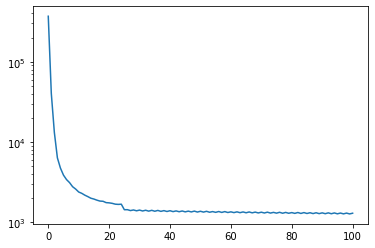

In [ ]:
# Plot errors over epocs
plt.plot(res.err)
plt.gca().set_yscale('log') # log scale makes these plots easier to read
plt.show()
plt.close()

In [ ]:
# Compute just factors, but use bold driver and slower learning
res = sgd(data, 10, bold_driver=3, factor_learning_rate=0.01)

Epoch   0: error 343272.90	factor_learning rate = 0.01
Epoch   1: error 9702.68	factor_learning rate = 0.01
Epoch   2: error 5016.61	factor_learning rate = 0.01
Epoch   3: error 4066.45	factor_learning rate = 0.01
Epoch   4: error 3468.45	factor_learning rate = 0.01
Epoch   5: error 3089.60	factor_learning rate = 0.01
Epoch   6: error 2788.09	factor_learning rate = 0.01
Epoch   7: error 2569.38	factor_learning rate = 0.01
Epoch   8: error 2446.39	factor_learning rate = 0.01
Epoch   9: error 2275.14	factor_learning rate = 0.01
Epoch  10: error 2177.26	factor_learning rate = 0.01
Epoch  11: error 2078.20	factor_learning rate = 0.01
Epoch  12: error 2027.66	factor_learning rate = 0.01
Epoch  13: error 1960.16	factor_learning rate = 0.01
Epoch  14: error 1897.38	factor_learning rate = 0.01
Epoch  15: error 1852.50	factor_learning rate = 0.01
Epoch  16: error 1852.32	factor_learning rate = 0.01
Epoch  17: error 1793.50	factor_learning rate = 0.01
Epoch  18: error 1781.63	factor_learning rat

In [ ]:
val_err = squared_error(validation, res.L, res.R)
print('Only factors, fixed rate, no regularization')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

Only factors, fixed rate, no regularization
Final training error = 1365.280	Relative error = 0.024395606035237705
    Validation error = 188.997	Relative error = 0.49569468928693805


In [ ]:
#The validation error drops further :)

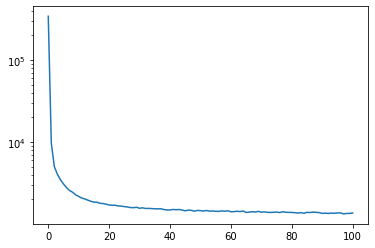

In [ ]:
# Plot errors over epocs
plt.plot(res.err)
plt.gca().set_yscale('log') # log scale makes these plots easier to read
plt.show()
plt.close()

In [ ]:
# Compute factors and bias
res = sgd(data, 10, bold_driver=2, factor_learning_rate=0.0001, bias_learning_rate=0.0001, verbose=True)

Epoch   0: error 671816.24	factor_learning rate = 0.0001
Epoch   1: error 280363.23	factor_learning rate = 0.0002
Epoch   2: error 124187.78	factor_learning rate = 0.0004
Epoch   3: error 64469.33	factor_learning rate = 0.0008
Epoch   4: error 37120.80	factor_learning rate = 0.0016
Epoch   5: error 21327.57	factor_learning rate = 0.0032
Epoch   6: error 11464.23	factor_learning rate = 0.0064
Epoch   7: error 6011.73	factor_learning rate = 0.01
Epoch   8: error 3778.54	factor_learning rate = 0.01
Epoch   9: error 2826.11	factor_learning rate = 0.01
Epoch  10: error 2443.67	factor_learning rate = 0.01
Epoch  11: error 2194.13	factor_learning rate = 0.01
Epoch  12: error 2020.21	factor_learning rate = 0.01
Epoch  13: error 1929.07	factor_learning rate = 0.01
Epoch  14: error 1867.64	factor_learning rate = 0.01
Epoch  15: error 1834.14	factor_learning rate = 0.01
Epoch  16: error 1768.80	factor_learning rate = 0.01
Epoch  17: error 1714.83	factor_learning rate = 0.01
Epoch  18: error 1660.

In [ ]:
val_err = squared_error(validation, res.L, res.R, res.global_bias, res.row_bias, res.col_bias)
print('Bias only, no regularization')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

Bias only, no regularization
Final training error = 1285.582	Relative error = 0.02297151945956205
    Validation error = 222.025	Relative error = 0.5823179086533342


In [ ]:
# Print the movies based on their bias top 10 and bottom 10
print_factors(res.col_bias, movies)

Factor 0 top-10
  1	Pulp Fiction (1994)	0.299
  2	Cell 211 (Celda 211) (2009)	0.279
  3	Reservoir Dogs (1992)	0.264
  4	Hearts of Darkness: A Filmmakers Apocalypse (1991)	0.259
  5	Watchmen: Tales of the Black Freighter (2009)	0.257
  6	Syrup (2013)	0.255
  7	Stalker (1979)	0.248
  8	Léon: The Professional (a.k.a. The Professional) (Léon) (1994)	0.241
  9	And the Band Played On (1993)	0.236
 10	Fist Fight (2017)	0.235

Factor 0 bottom-10
  1	No Small Affair (1984)	-0.455
  2	Infernal Affairs 2 (Mou gaan dou II) (2003)	-0.388
  3	Stefan Zweig: Farewell to Europe (2016)	-0.362
  4	Urban Legends: Final Cut (2000)	-0.353
  5	Grind (2003)	-0.351
  6	Aelita: The Queen of Mars (Aelita) (1924)	-0.347
  7	My Bloody Valentine (1981)	-0.344
  8	Boat Trip (2003)	-0.344
  9	The Crew (2016)	-0.343
 10	3 Days to Kill (2014)	-0.343



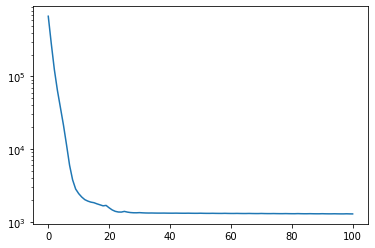

In [ ]:
# Plot errors over epocs
plt.plot(res.err)
plt.gca().set_yscale('log') # log scale makes these plots easier to read
plt.show()
plt.close()
#The results arn't better because the validation error is 222 while I was already
#able to achieve a validation error of 188 earlier. 

In [ ]:
#Now doing SGD with regularization L2-Regularization
res = sgd(data, 10, bold_driver=2, factor_learning_rate=0.0001, bias_learning_rate=0.0001, factor_regu=0.001, bias_regu=0.001, verbose=False)

In [ ]:
val_err = squared_error(validation, res.L, res.R, res.global_bias, res.row_bias, res.col_bias)
print('Factors and bias, regularized')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

Factors and bias, regularized
Final training error = 1231.810	Relative error = 0.022010698393192092
    Validation error = 203.652	Relative error = 0.5341297631399506


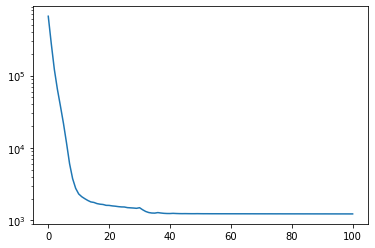

In [ ]:
# Plot errors over epocs
plt.plot(res.err)
plt.gca().set_yscale('log') # log scale makes these plots easier to read
plt.show()
plt.close()
#The results arn't better because the validation error is 222 while I was already
#able to achieve a validation error of 188 earlier. 

In [ ]:
#Now doing SGD with regularization L2-Regularization, bold driver of 3, factor learning rate of 0.01 
res = sgd(data, 10, bold_driver=3, factor_learning_rate=0.01, bias_learning_rate=0.0001, factor_regu=0.001, bias_regu=0.001, verbose=True)

Epoch   0: error 653219.96	factor_learning rate = 0.01
Epoch   1: error 8972.64	factor_learning rate = 0.01
Epoch   2: error 4457.27	factor_learning rate = 0.01
Epoch   3: error 3431.22	factor_learning rate = 0.01
Epoch   4: error 2870.53	factor_learning rate = 0.01
Epoch   5: error 2546.66	factor_learning rate = 0.01
Epoch   6: error 2306.88	factor_learning rate = 0.01
Epoch   7: error 2141.87	factor_learning rate = 0.01
Epoch   8: error 2019.36	factor_learning rate = 0.01
Epoch   9: error 1932.13	factor_learning rate = 0.01
Epoch  10: error 1866.20	factor_learning rate = 0.01
Epoch  11: error 1807.71	factor_learning rate = 0.01
Epoch  12: error 1771.94	factor_learning rate = 0.01
Epoch  13: error 1712.39	factor_learning rate = 0.01
Epoch  14: error 1667.06	factor_learning rate = 0.01
Epoch  15: error 1640.71	factor_learning rate = 0.01
Epoch  16: error 1613.60	factor_learning rate = 0.01
Epoch  17: error 1586.59	factor_learning rate = 0.01
Epoch  18: error 1564.48	factor_learning rat

In [ ]:
val_err = squared_error(validation, res.L, res.R, res.global_bias, res.row_bias, res.col_bias)
print('Factors and bias, regularized')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

Factors and bias, regularized
Final training error = 1151.517	Relative error = 0.020575962304935237
    Validation error = 267.460	Relative error = 0.7014830460905507


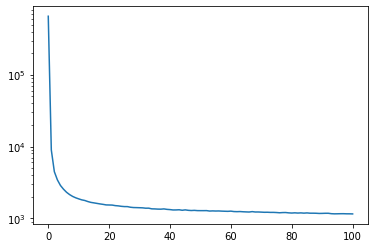

In [ ]:
# Plot errors over epocs
plt.plot(res.err)
plt.gca().set_yscale('log') # log scale makes these plots easier to read
plt.show()
plt.close()

In [ ]:
#Regularization comes with a cost of increasing the error rate. The validation error has increased. 
#But perhaps that is what is needed.

In [ ]:
fullArray = data.toarray()

In [ ]:
from numpy.linalg import svd
## Compute SVD of data
U, S, V = svd(fullArray, full_matrices=False, compute_uv=True)

In [ ]:
#Squared Error
se = S @ V

In [ ]:
se

array([ 7.90568756, -8.37391345, -0.05052415, ..., -0.73988401,
       -0.73988401, -0.73988401])

In [ ]:
#To get truncated SVD 
from sklearn.utils.extmath import randomized_svd

Utruncated, Sigma, VTtruncated = randomized_svd(fullArray,n_components=10,n_iter=5,random_state=None)

In [ ]:
seTruncated = Sigma @ VTtruncated

In [ ]:
seTruncated

array([0.06608784, 0.64533515, 4.51407857, ..., 0.26432449, 0.26432449,
       0.26432449])

In [ ]:
#Now doing the same for validation data

In [ ]:
validationFull = validation.toarray()

In [ ]:
validationFull

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:

UtruncatedValid, SigmaValid, VTtruncatedValid = randomized_svd(validationFull,n_components=10,n_iter=5,random_state=None)

In [ ]:
seValidationTruncated = SigmaValid @ VTtruncatedValid

In [ ]:
seValidationTruncated

array([-1.66403198e-16, -2.38323818e-16,  3.52371195e-16, ...,
        0.00000000e+00,  0.00000000e+00, -9.59328450e-07])

In [ ]:
len(seValidationTruncated)

9341

In [ ]:
len(seTruncated)

9724

In [ ]:
#Since the lenghts are differenct, they cannot be 1 to 1 compared.

In [ ]:
#Task 2#
#Task 2: Initial solutions and hyperparameter optimization
#We continue using the same data and code as above. We start by looking at the effect of the initial
#solutions. By default, the code uses uniform distribution from unit interval for factor matrices that are then
#normalized, and normal distribution with 0.1 standard deviation for biases. Try following choices for initial
#solutions and report the results. Explain what happened and why you think it happened (e.g. results were
#better because something or the code crashed because of something else).
#a) Factor matrices and bias vectors are all-1s matrices and vectors. (No normalization.)
#b) Factor matrices and bias vectors are all-0s matrices and vectors. (No normalization.)
#c) Factor matrices are drawn from normal distribution with 0.1 standard deviation. (No normalization.)
#d) Factor matrices are random integer matrices with values from 0 to 6, normalized.
#Next we try to optimize the hyperparameters. The algorithm has the following hyperparameters:
#a) rank
#b) number of epochs
#c) learning rates (for simplicity, let’s assume they’re same for factors and biases)
#d) bold driver multiplier
#e) regularization coefficients (again, same for factors and biases).
#
#The standard way to optimize these is to select some values for each hyperparameter and try all
#combinations of the potential values. This is called a grid search. To test how good each combination is,
#one should also run cross validation; a 5-fold cross validation, for example, would split the training data
#into five random subsets, find the decomposition based on four of them, and test the result on the fifth, and
#repeat four more times so that each subset would get left out once. The final quality value would be the
#average error over the five runs. Assume we want to try 5 different values for each hyperparameter and use
#5-fold cross validation. Time the algorithm running once over the data set and estimate how long the full
#grid search would take. You can assume 5-fold cross validation takes five times the time one run takes, and
#that run time grows linearly with number of epochs and rank. Report what you calculated.
#If the expected run time exceeds the time you have before the DL, design an experiment where you try
#at least the following (you can change the values if you want, but explain why in your report):
#a) rank = 10
#b) number of epochs = 100 (or smaller if you think you converge)
#c) learning rates in {10−5
#, 10−4
#, 10−3}
#d) bold driver multiplier = 2 (or some other coefficient)
#e) regularization coefficients in {10−6
#, 10−5
#, 10−4}.
#Notice that this still leaves you with nine combinations that you must be able to run. Be prepared to leave
#your computer running overnight!
#After you’ve found the optimum combination of hyperparameters, run SGD with full training data using
#those parameters and compute the validation error. Is the error better than the best you’ve got so far? Why?
#Argue!

In [ ]:
#a) Factor matrices and bias vectors are all-1s matrices and vectors. (No normalization.)
n = data.get_shape()[0]
m = data.get_shape()[1]
avg = data.sum()/data.count_nonzero()
# Initial factors are given as a tuple (L, R); R is transposed
init_LR = (np.ones(shape=(n,10)), np.ones(shape=(m,10)))
# Initial biases are a tuple (global_bias, row_bias, col_bias
# Give the true global bias.
init_biases = (avg, np.ones(shape=n), np.ones(shape=m))

# You can change the learning rates and bold driver factor if you want
res = sgd(data, 10, bold_driver=2, factor_learning_rate=0.0001, bias_learning_rate=0.0001, verbose=True, init_LR=init_LR, init_biases=init_biases)


Epoch   0: error 14435843.09	factor_learning rate = 0.0001
Epoch   1: error 3687950.83	factor_learning rate = 0.0002
Epoch   2: error 803754.06	factor_learning rate = 0.0004
Epoch   3: error 327210.90	factor_learning rate = 0.0008
Epoch   4: error 143830.17	factor_learning rate = 0.0016
Epoch   5: error 63452.22	factor_learning rate = 0.0032
Epoch   6: error 27742.48	factor_learning rate = 0.0064
Epoch   7: error 12648.93	factor_learning rate = 0.01
Epoch   8: error 7855.12	factor_learning rate = 0.01
Epoch   9: error 4951.88	factor_learning rate = 0.01
Epoch  10: error 3806.94	factor_learning rate = 0.01
Epoch  11: error 3460.73	factor_learning rate = 0.01
Epoch  12: error 3345.87	factor_learning rate = 0.01
Epoch  13: error 3127.46	factor_learning rate = 0.01
Epoch  14: error 3115.84	factor_learning rate = 0.01
Epoch  15: error 2973.42	factor_learning rate = 0.01
Epoch  16: error 2926.97	factor_learning rate = 0.01
Epoch  17: error 2875.61	factor_learning rate = 0.01
Epoch  18: error

In [ ]:
val_err = squared_error(validation, res=res)
print('Initial solutions as all-1s vectors')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

Initial solutions as all-1s vectors
Final training error = 1868.113	Relative error = 0.03338051972473484
    Validation error = 5438.536	Relative error = 14.263972215757216


In [ ]:
#The validation error is far higher than in other approaches 

In [ ]:
#b) Factor matrices and bias vectors are all-0s matrices and vectors. (No normalization.)
# Initial factors are given as a tuple (L, R); R is transposed
init_LR = (np.zeros(shape=(n,10)), np.zeros(shape=(m,10)))
# Initial biases are a tuple (global_bias, row_bias, col_bias
# Give the true global bias.
init_biases = (avg, np.zeros(shape=n), np.zeros(shape=m))

# You can change the learning rates and bold driver factor if you want
res = sgd(data, 10, bold_driver=2, factor_learning_rate=0.0001, bias_learning_rate=0.0001, verbose=True, init_LR=init_LR, init_biases=init_biases)


Epoch   0: error 3299.09	factor_learning rate = 0.0001


/content/util.py:17: RuntimeWarning: invalid value encountered in double_scalars
  L[:,k] *= np.sqrt(sL*sR)/sL
/content/util.py:18: RuntimeWarning: invalid value encountered in double_scalars
  R[:,k] *= np.sqrt(sL*sR)/sR


Epoch   1: error NAN	factor_learning rate = 0.0001
Epoch   2: error NAN	factor_learning rate = 0.0001
Epoch   3: error NAN	factor_learning rate = 0.0001
Epoch   4: error NAN	factor_learning rate = 0.0001
Epoch   5: error NAN	factor_learning rate = 0.0001
Epoch   6: error NAN	factor_learning rate = 0.0001
Epoch   7: error NAN	factor_learning rate = 0.0001
Epoch   8: error NAN	factor_learning rate = 0.0001
Epoch   9: error NAN	factor_learning rate = 0.0001
Epoch  10: error NAN	factor_learning rate = 0.0001
Epoch  11: error NAN	factor_learning rate = 0.0001
Epoch  12: error NAN	factor_learning rate = 0.0001
Epoch  13: error NAN	factor_learning rate = 0.0001
Epoch  14: error NAN	factor_learning rate = 0.0001
Epoch  15: error NAN	factor_learning rate = 0.0001
Epoch  16: error NAN	factor_learning rate = 0.0001
Epoch  17: error NAN	factor_learning rate = 0.0001
Epoch  18: error NAN	factor_learning rate = 0.0001
Epoch  19: error NAN	factor_learning rate = 0.0001
Epoch  20: error NAN	factor_lea

In [ ]:
val_err = squared_error(validation, res=res)
print('Initial solutions as all-1s vectors')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

Initial solutions as all-1s vectors
Final training error =   nan	Relative error = nan
    Validation error =   nan	Relative error = nan


In [ ]:
#Thus we see that in the zero case we do not have any solution

In [ ]:


#np.random.normal(0, 1, (3, 3))
# Initial factors are given as a tuple (L, R); R is transposed
init_LR = (np.random.normal(0, 1, (n, 10)), np.random.normal(0, 1, (m, 10)))
# Initial biases are a tuple (global_bias, row_bias, col_bias
# Give the true global bias.
#init_biases = (avg, np.random.normal(0, 1, (n, 10)), np.random.normal(0, 1, (m, 10)))

In [ ]:
init_LR

(array([[-1.17425096,  0.19918981, -0.60222315, ...,  0.94614608,
          0.72020795, -0.18975039],
        [ 0.12938449,  2.18551624,  1.17862941, ..., -1.60806639,
         -0.12300904, -0.36229804],
        [-1.12518146,  0.20165542, -0.70840878, ..., -0.99945708,
          0.18227732,  0.28327222],
        ...,
        [-0.95893046, -0.5124027 , -0.95621689, ...,  0.33078595,
          0.21427449, -0.35070937],
        [ 1.05471018, -1.59608667,  1.17445045, ...,  0.33615226,
          2.22510379, -0.94514869],
        [-0.5575909 ,  0.30100682, -2.3460474 , ...,  0.22825616,
         -1.41118481, -1.94459559]]),
 array([[-1.05958836, -0.22664738, -0.96912525, ..., -2.11702163,
         -1.40406968, -1.03730845],
        [-0.97952757,  1.242295  , -0.54230601, ..., -0.63007592,
          0.15228372,  0.97380255],
        [-0.33820309,  0.31873166,  0.1123456 , ..., -0.30794351,
         -0.75334118, -1.86813542],
        ...,
        [ 0.44960496,  0.24646594,  0.66482954, ..., -

In [ ]:
res = sgd(data, 10, bold_driver=2, factor_learning_rate=0.0001, bias_learning_rate=0.0001, verbose=True, init_LR=init_LR)


Epoch   0: error 1070086.74	factor_learning rate = 0.0001


/content/util.py:17: RuntimeWarning: invalid value encountered in sqrt
  L[:,k] *= np.sqrt(sL*sR)/sL
/content/util.py:18: RuntimeWarning: invalid value encountered in sqrt
  R[:,k] *= np.sqrt(sL*sR)/sR


Epoch   1: error NAN	factor_learning rate = 0.0001
Epoch   2: error NAN	factor_learning rate = 0.0001
Epoch   3: error NAN	factor_learning rate = 0.0001
Epoch   4: error NAN	factor_learning rate = 0.0001
Epoch   5: error NAN	factor_learning rate = 0.0001
Epoch   6: error NAN	factor_learning rate = 0.0001
Epoch   7: error NAN	factor_learning rate = 0.0001
Epoch   8: error NAN	factor_learning rate = 0.0001
Epoch   9: error NAN	factor_learning rate = 0.0001
Epoch  10: error NAN	factor_learning rate = 0.0001
Epoch  11: error NAN	factor_learning rate = 0.0001
Epoch  12: error NAN	factor_learning rate = 0.0001
Epoch  13: error NAN	factor_learning rate = 0.0001
Epoch  14: error NAN	factor_learning rate = 0.0001
Epoch  15: error NAN	factor_learning rate = 0.0001
Epoch  16: error NAN	factor_learning rate = 0.0001
Epoch  17: error NAN	factor_learning rate = 0.0001
Epoch  18: error NAN	factor_learning rate = 0.0001
Epoch  19: error NAN	factor_learning rate = 0.0001
Epoch  20: error NAN	factor_lea

In [ ]:
#So we see that although we are able to generate L R initial solutio matrices, the final
# solution is a not a number

In [ ]:
#Factor matrices are random integer matrices with values from 0 to 6, normalized.
L= np.random.randint(7, size=(n,10)) #Create a random matrix of size n by 10 and having values 0 to 6
R = np.random.randint(7, size=(m,10))
print("Original Matrix:")
print(L,R)
Lmax, Lmin = L.max(), L.min()
Rmax, Rmin = R.max(), R.min()
L = (L - Lmin)/(Lmax - Lmin)
R = (R - Rmin) / (Rmax -  Rmin)
print("After normalization:")
print(L,R)

Original Matrix:
[[6 2 5 ... 3 3 5]
 [0 3 4 ... 2 0 1]
 [6 3 1 ... 3 0 4]
 ...
 [5 2 3 ... 2 4 0]
 [1 3 0 ... 5 1 0]
 [6 2 5 ... 0 3 2]] [[2 5 4 ... 0 1 1]
 [5 0 4 ... 3 1 0]
 [0 4 1 ... 3 3 6]
 ...
 [5 6 4 ... 6 0 3]
 [3 2 5 ... 1 1 4]
 [4 4 6 ... 0 3 5]]
After normalization:
[[1.         0.33333333 0.83333333 ... 0.5        0.5        0.83333333]
 [0.         0.5        0.66666667 ... 0.33333333 0.         0.16666667]
 [1.         0.5        0.16666667 ... 0.5        0.         0.66666667]
 ...
 [0.83333333 0.33333333 0.5        ... 0.33333333 0.66666667 0.        ]
 [0.16666667 0.5        0.         ... 0.83333333 0.16666667 0.        ]
 [1.         0.33333333 0.83333333 ... 0.         0.5        0.33333333]] [[0.33333333 0.83333333 0.66666667 ... 0.         0.16666667 0.16666667]
 [0.83333333 0.         0.66666667 ... 0.5        0.16666667 0.        ]
 [0.         0.66666667 0.16666667 ... 0.5        0.5        1.        ]
 ...
 [0.83333333 1.         0.66666667 ... 1.         0.  

In [ ]:

# Initial factors are given as a tuple (L, R); R is transposed
init_LR = (L, R)
# 

In [ ]:
res = sgd(data, 10, bold_driver=2, factor_learning_rate=0.0001, bias_learning_rate=0.0001, verbose=True, init_LR=init_LR)


Epoch   0: error 674724.85	factor_learning rate = 0.0001
Epoch   1: error 351979.34	factor_learning rate = 0.0002
Epoch   2: error 126131.66	factor_learning rate = 0.0004
Epoch   3: error 61531.21	factor_learning rate = 0.0008
Epoch   4: error 34664.84	factor_learning rate = 0.0016
Epoch   5: error 19661.42	factor_learning rate = 0.0032
Epoch   6: error 10643.41	factor_learning rate = 0.0064
Epoch   7: error 5699.89	factor_learning rate = 0.01
Epoch   8: error 3719.01	factor_learning rate = 0.01
Epoch   9: error 2699.41	factor_learning rate = 0.01
Epoch  10: error 2283.98	factor_learning rate = 0.01
Epoch  11: error 2098.93	factor_learning rate = 0.01
Epoch  12: error 2004.60	factor_learning rate = 0.01
Epoch  13: error 1897.24	factor_learning rate = 0.01
Epoch  14: error 1828.44	factor_learning rate = 0.01
Epoch  15: error 1776.12	factor_learning rate = 0.01
Epoch  16: error 1716.26	factor_learning rate = 0.01
Epoch  17: error 1672.60	factor_learning rate = 0.01
Epoch  18: error 1657.

In [ ]:
val_err = squared_error(validation, res=res)
print('Initial solutions as all-1s vectors')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

Initial solutions as all-1s vectors
Final training error = 1262.930	Relative error = 0.022566763306068317
    Validation error = 289.776	Relative error = 0.7600123874348135


In [ ]:

learning_rates = [1e-5,1e-4,1e-3]

start = time.process_time()
err = []
for rate in learning_rates:
    err.append( cv(data, folds=5, k=10, bold_driver=2, factor_learning_rate=rate, bias_learning_rate=rate, verbose=False) )
print('Rate\terr')
for i in range(len(learning_rates)):
    print(f'{learning_rates[i]}\t{err[i]}')
print(time.process_time() - start)

Fold 1/5
	Error = 2522.5388802632397
Fold 2/5
	Error = 2489.1905454788107
Fold 3/5
	Error = 2504.4814770818143
Fold 4/5
	Error = 2603.2898195405733
Fold 5/5
	Error = 2436.963867852763
Fold 1/5
	Error = 2606.133391562352
Fold 2/5
	Error = 2515.1371980337613
Fold 3/5
	Error = 2425.8187872819076
Fold 4/5
	Error = 2356.2555134840804
Fold 5/5
	Error = 2641.0567237722935
Fold 1/5
	Error = 2543.449346384727
Fold 2/5
	Error = 2723.9636613255407
Fold 3/5
	Error = 2485.382732583863
Fold 4/5
	Error = 2605.006823579612
Fold 5/5
	Error = 2428.441760061842
Rate	err
1e-05	2511.2929180434403
0.0001	2508.880322826879
0.001	2557.248864787117
2956.489249872


In [ ]:
#The time taken in code above is 2956.48 SECs.The best parameter is for 
# learning rate 0.0001 for which the average error is the lowest.
#data = [data]
#k = [10]

#from sklearn.model_selection import GridSearchCV
#param_grid = {'factor_regu':factor_regu, 'bias_regu': bias_regu,'k':k,'factor_learning_rates': learning_rates,'bias_learning_rate': learning_rates, 'verbose': True, 'regularization_coeff': regularization_coeff, 'bold_driver': bold_driver}


In [ ]:
regularization_coeff = [1e-6,1e-5,1e-4]

start = time.process_time()
err = []
for coeff in regularization_coeff:
    err.append( cv(data, folds=5, k=10, bold_driver=2, factor_regu=coeff, factor_learning_rate = 0.0001, bias_regu=coeff, verbose=False) )
print('Rate\terr')
for i in range(len(regularization_coeff)):
    print(f'{regularization_coeff[i]}\t{err[i]}')
print(time.process_time() - start)

Fold 1/5
	Error = 2743.658330049852
Fold 2/5
	Error = 2961.9016783817465
Fold 3/5
	Error = 2748.7784574101943
Fold 4/5
	Error = 2969.309548115035
Fold 5/5
	Error = 2633.911537871388
Fold 1/5
	Error = 2935.336981518091
Fold 2/5
	Error = 2720.21982641188
Fold 3/5
	Error = 2864.97255927242
Fold 4/5
	Error = 2854.3106561156783
Fold 5/5
	Error = 2835.735287572032
Fold 1/5
	Error = 2574.718204069597
Fold 2/5
	Error = 2654.184835630396
Fold 3/5
	Error = 2780.8703271832537
Fold 4/5
	Error = 2764.8582985545318
Fold 5/5
	Error = 2651.355910728593
Rate	err
1e-06	2811.511910365643
1e-05	2842.1150621780203
0.0001	2685.1975152332743
2495.0275192910003


In [ ]:
#We get the lowest error for REG COEFF 0.0001 . Total time taken was 2495 secs.

In [ ]:
#Now doing SGD with regularization L2-Regularization, bold driver of 2, factor learning rate of 0.0001 and regularization of 0.0001 as we determined above 
res = sgd(data, 10, bold_driver=2, factor_learning_rate=0.0001, bias_learning_rate=0.0001, factor_regu=0.0001, bias_regu=0.0001, verbose=True)

Epoch   0: error 628968.60	factor_learning rate = 0.0001
Epoch   1: error 270501.48	factor_learning rate = 0.0002
Epoch   2: error 122283.66	factor_learning rate = 0.0004
Epoch   3: error 64240.54	factor_learning rate = 0.0008
Epoch   4: error 37100.29	factor_learning rate = 0.0016
Epoch   5: error 21236.32	factor_learning rate = 0.0032
Epoch   6: error 11513.69	factor_learning rate = 0.0064
Epoch   7: error 6153.06	factor_learning rate = 0.01
Epoch   8: error 3830.75	factor_learning rate = 0.01
Epoch   9: error 2860.91	factor_learning rate = 0.01
Epoch  10: error 2420.47	factor_learning rate = 0.01
Epoch  11: error 2190.95	factor_learning rate = 0.01
Epoch  12: error 2031.73	factor_learning rate = 0.01
Epoch  13: error 1925.51	factor_learning rate = 0.01
Epoch  14: error 1833.90	factor_learning rate = 0.01
Epoch  15: error 1790.35	factor_learning rate = 0.01
Epoch  16: error 1753.30	factor_learning rate = 0.01
Epoch  17: error 1692.71	factor_learning rate = 0.01
Epoch  18: error 1692.

In [ ]:
val_err = squared_error(validation, res=res)
print('Initial solutions as all-1s vectors')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')
   


Initial solutions as all-1s vectors
Final training error = 1277.875	Relative error = 0.02283381383939651
    Validation error = 233.456	Relative error = 0.6122996982054809


In [ ]:
#This result is lower than the best we got earlier, because the bold driver factor used there was 3
#So we need to work for that, and see the best parameters corresponding to it.

In [ ]:
learning_rates = [1e-5,1e-4,1e-3]

start = time.process_time()
err = []
for rate in learning_rates:
    err.append( cv(data, folds=5, k=10, bold_driver=3, factor_learning_rate=rate, bias_learning_rate=rate, verbose=False) )
print('Rate\terr')
for i in range(len(learning_rates)):
    print(f'{learning_rates[i]}\t{err[i]}')
print(time.process_time() - start)

Fold 1/5
	Error = 2722.5288581181385
Fold 2/5
	Error = 2548.302374176806
Fold 3/5
	Error = 2531.347277367209
Fold 4/5
	Error = 2540.238496009842
Fold 5/5
	Error = 2748.2896215624846
Fold 1/5
	Error = 2633.391336263878
Fold 2/5
	Error = 2650.69334040362
Fold 3/5
	Error = 2542.0456009362965
Fold 4/5
	Error = 2656.0247062022363
Fold 5/5
	Error = 2449.8824910680437
Fold 1/5
	Error = 2312.145161770416
Fold 2/5
	Error = 2552.8925029346537
Fold 3/5
	Error = 2418.1880469407265
Fold 4/5
	Error = 2353.8519240647397
Fold 5/5
	Error = 2659.890620634777
Rate	err
1e-05	2618.141325446896
0.0001	2586.4074949748147
0.001	2459.3936512690625
2978.851456674999


In [ ]:
#The error is minimum for 0.001 value. So I use this to get the next parameter optimum value

In [ ]:
regularization_coeff = [1e-6,1e-5,1e-4]

start = time.process_time()
err = []
for coeff in regularization_coeff:
    err.append( cv(data, folds=5, k=10, bold_driver=3, factor_regu=coeff, factor_learning_rate = 0.001, bias_regu=coeff, verbose=False) )
print('Rate\terr')
for i in range(len(regularization_coeff)):
    print(f'{regularization_coeff[i]}\t{err[i]}')
print(time.process_time() - start)

Fold 1/5
	Error = 2801.487380575274
Fold 2/5
	Error = 2820.085083191071
Fold 3/5
	Error = 2947.297234022993
Fold 4/5
	Error = 3017.180038227253
Fold 5/5
	Error = 3011.9426937494577
Fold 1/5
	Error = 2956.9260771417444
Fold 2/5
	Error = 2868.551920255637
Fold 3/5
	Error = 2764.358354477345
Fold 4/5
	Error = 3131.893527184753
Fold 5/5
	Error = 2957.233345347008
Fold 1/5
	Error = 2743.44515320909
Fold 2/5
	Error = 2595.991925187045
Fold 3/5
	Error = 2684.655141344161
Fold 4/5
	Error = 2688.8406079075107
Fold 5/5
	Error = 2750.029991512247
Rate	err
1e-06	2919.5984859532095
1e-05	2935.7926448812973
0.0001	2692.5925638320105
2531.3175626440006


In [ ]:
#So it took 2531 seconds to complete and the lowest error came for 0.0001 as regularization coefficient

In [ ]:
#Now doing SGD with regularization L2-Regularization, bold driver of 3, factor learning rate of 0.001 and regularization of 0.0001 as we determined above 
res = sgd(data, 10, bold_driver=3, factor_learning_rate=0.001, bias_learning_rate=0.001, factor_regu=0.0001, bias_regu=0.0001, verbose=True)

Epoch   0: error 666938.39	factor_learning rate = 0.001
Epoch   1: error 47083.84	factor_learning rate = 0.003
Epoch   2: error 16936.37	factor_learning rate = 0.009000000000000001
Epoch   3: error 6318.49	factor_learning rate = 0.01
Epoch   4: error 3611.23	factor_learning rate = 0.01
Epoch   5: error 2771.23	factor_learning rate = 0.01
Epoch   6: error 2335.21	factor_learning rate = 0.01
Epoch   7: error 2155.13	factor_learning rate = 0.01
Epoch   8: error 2039.48	factor_learning rate = 0.01
Epoch   9: error 1901.03	factor_learning rate = 0.01
Epoch  10: error 1839.26	factor_learning rate = 0.01
Epoch  11: error 1770.64	factor_learning rate = 0.01
Epoch  12: error 1746.21	factor_learning rate = 0.01
Epoch  13: error 1717.87	factor_learning rate = 0.01
Epoch  14: error 1662.76	factor_learning rate = 0.01
Epoch  15: error 1650.05	factor_learning rate = 0.01
Epoch  16: error 1632.47	factor_learning rate = 0.01
Epoch  17: error 1675.20	factor_learning rate = 0.001
Epoch  18: error 1358.6

In [ ]:
val_err = squared_error(validation, res=res)
print('Initial solutions as all-1s vectors')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')
  

Initial solutions as all-1s vectors
Final training error = 1240.353	Relative error = 0.02216334060456452
    Validation error = 240.222	Relative error = 0.6300442533451417


In [ ]:
#However, this validation score is greater than 188 what we obtained earlier:

#res = sgd(data, 10, bold_driver=3, factor_learning_rate=0.01)
#So we try those learning rates as well

In [ ]:
learning_rates = [0.01,0.1,1e-5,1e-4,1e-3]

start = time.process_time()
err = []
for rate in learning_rates:
    err.append( cv(data, folds=5, k=10, bold_driver=3, factor_learning_rate=rate, bias_learning_rate=rate, verbose=False) )
print('Rate\terr')
for i in range(len(learning_rates)):
    print(f'{learning_rates[i]}\t{err[i]}')
print(time.process_time() - start)

Fold 1/5
	Error = 2319.266736600038
Fold 2/5
	Error = 2361.0671640720857
Fold 3/5
	Error = 2329.826354418939
Fold 4/5
	Error = 2262.4804412581766
Fold 5/5
	Error = 2303.278247697438
Fold 1/5
Error is 2578798.003292662, you should probably use slower learning rate
Error is 1991.856350964568, you should probably use slower learning rate
Error is 312391506.8085291, you should probably use slower learning rate
Error is 1218.9153832294942, you should probably use slower learning rate
Error is 51590.16251397699, you should probably use slower learning rate
Error is 463941070.8768489, you should probably use slower learning rate
Error is 3547.2357417941466, you should probably use slower learning rate
Error is 993157160418.4879, you should probably use slower learning rate
Error is 27590032.47655711, you should probably use slower learning rate
Error is 6882.161335882811, you should probably use slower learning rate
Error is 1181.9932999403143, you should probably use slower learning rate
Err

/content/util.py:83: RuntimeWarning: overflow encountered in multiply
  * (err * R[col,:] - factor_regu * L[row,:]))
/content/util.py:85: RuntimeWarning: invalid value encountered in multiply
  * (err * L[row,:] - factor_regu * R[col,:]))
/content/util.py:85: RuntimeWarning: overflow encountered in multiply
  * (err * L[row,:] - factor_regu * R[col,:]))
/content/util.py:83: RuntimeWarning: invalid value encountered in multiply
  * (err * R[col,:] - factor_regu * L[row,:]))
/content/util.py:89: RuntimeWarning: invalid value encountered in double_scalars
  * (err - bias_regu * r_bias[row]))
/content/util.py:91: RuntimeWarning: invalid value encountered in double_scalars
  * (err - bias_regu * c_bias[col]))



Error is 2.899210470111975e+42, you should probably use slower learning rate
Error is 5.5509077677588035e+124, you should probably use slower learning rate
Error is 4.326526905576519e+124, you should probably use slower learning rate
Error is 2.2168150790463715e+217, you should probably use slower learning rate
Error is 1.8265681164758376e+128, you should probably use slower learning rate
Error is 1.4353950287672005e+176, you should probably use slower learning rate
Error is 2.0842926359695783e+197, you should probably use slower learning rate
Error is 6.618948176796201e+39, you should probably use slower learning rate
Error is 2.3586735938457186e+145, you should probably use slower learning rate
Error is 5.210759682281699e+275, you should probably use slower learning rate
Error is 3.470348623037548e+160, you should probably use slower learning rate
Error is 2.9417234909348453e+285, you should probably use slower learning rate
Error is 2.3398279575364643e+35, you should probably use s

/content/util.py:85: RuntimeWarning: overflow encountered in multiply
  * (err * L[row,:] - factor_regu * R[col,:]))
/content/util.py:83: RuntimeWarning: overflow encountered in multiply
  * (err * R[col,:] - factor_regu * L[row,:]))
/content/util.py:85: RuntimeWarning: invalid value encountered in multiply
  * (err * L[row,:] - factor_regu * R[col,:]))
/content/util.py:83: RuntimeWarning: invalid value encountered in multiply
  * (err * R[col,:] - factor_regu * L[row,:]))
/content/util.py:89: RuntimeWarning: invalid value encountered in double_scalars
  * (err - bias_regu * r_bias[row]))
/content/util.py:91: RuntimeWarning: invalid value encountered in double_scalars
  * (err - bias_regu * c_bias[col]))
/content/util.py:78: RuntimeWarning: invalid value encountered in double_scalars
  err -= g_bias + r_bias[row] + c_bias[col]



Error is 8.232650922209445e+243, you should probably use slower learning rate
Error is 1.7159844293116132e+94, you should probably use slower learning rate
Error is 1.8744716567641696e+24, you should probably use slower learning rate
Error is 7.521893713256859e+111, you should probably use slower learning rate
Error is 3.0821345682507122e+25, you should probably use slower learning rate
Error is 2.203550618890146e+215, you should probably use slower learning rate
Error is 3.760619444700303e+219, you should probably use slower learning rate
Error is 1.505060917325065e+191, you should probably use slower learning rate
Error is 1.8460952344190886e+55, you should probably use slower learning rate
Error is 4.85215916325497e+182, you should probably use slower learning rate
Error is 92527937.05273768, you should probably use slower learning rate
Error is 1.527305978762605e+64, you should probably use slower learning rate
Error is 6.532066445544082e+138, you should probably use slower learni

/content/util.py:85: RuntimeWarning: overflow encountered in multiply
  * (err * L[row,:] - factor_regu * R[col,:]))
/content/util.py:83: RuntimeWarning: overflow encountered in multiply
  * (err * R[col,:] - factor_regu * L[row,:]))
/content/util.py:85: RuntimeWarning: invalid value encountered in multiply
  * (err * L[row,:] - factor_regu * R[col,:]))
/content/util.py:83: RuntimeWarning: invalid value encountered in multiply
  * (err * R[col,:] - factor_regu * L[row,:]))
/content/util.py:89: RuntimeWarning: invalid value encountered in double_scalars
  * (err - bias_regu * r_bias[row]))
/content/util.py:91: RuntimeWarning: invalid value encountered in double_scalars
  * (err - bias_regu * c_bias[col]))



Error is 4.566259177388834e+80, you should probably use slower learning rate
Error is 1901.5464847228784, you should probably use slower learning rate
Error is 6.941347866495858e+31, you should probably use slower learning rate
Error is 6.82612720301116e+136, you should probably use slower learning rate
Error is 3.330263249548335e+227, you should probably use slower learning rate
Error is 2.6666639795012584e+31, you should probably use slower learning rate
Error is 6.793104021776614e+173, you should probably use slower learning rate
Error is 1.1469498068740804e+271, you should probably use slower learning rate
Error is 4.439815450143904e+60, you should probably use slower learning rate
Error is 2.991343969965e+235, you should probably use slower learning rate
Error is 3.183598678679461e+100, you should probably use slower learning rate
Error is 8296625.703240369, you should probably use slower learning rate
Error is 5.821464730080933e+194, you should probably use slower learning rate


/content/util.py:85: RuntimeWarning: overflow encountered in multiply
  * (err * L[row,:] - factor_regu * R[col,:]))
/content/util.py:83: RuntimeWarning: overflow encountered in multiply
  * (err * R[col,:] - factor_regu * L[row,:]))
/content/util.py:83: RuntimeWarning: invalid value encountered in multiply
  * (err * R[col,:] - factor_regu * L[row,:]))
/content/util.py:85: RuntimeWarning: invalid value encountered in multiply
  * (err * L[row,:] - factor_regu * R[col,:]))
/content/util.py:89: RuntimeWarning: invalid value encountered in double_scalars
  * (err - bias_regu * r_bias[row]))
/content/util.py:91: RuntimeWarning: invalid value encountered in double_scalars
  * (err - bias_regu * c_bias[col]))
/content/util.py:78: RuntimeWarning: invalid value encountered in double_scalars
  err -= g_bias + r_bias[row] + c_bias[col]


Error is 9.649513015696683e+165, you should probably use slower learning rate
Error is 6.539718932542365e+157, you should probably use slower learning rate
Error is 3.380817351017513e+188, you should probably use slower learning rate
Error is 3.882049956600133e+36, you should probably use slower learning rate
Error is 4.768495002094203e+121, you should probably use slower learning rate
Error is 4.377429141506494e+278, you should probably use slower learning rate
Error is 22307416.384557355, you should probably use slower learning rate
Error is 9.02611009609561e+139, you should probably use slower learning rate
Error is 1.6108945932909923e+277, you should probably use slower learning rate
Error is 6.920600729090869e+83, you should probably use slower learning rate
Error is 1.6246291542728796e+59, you should probably use slower learning rate
Error is 1.6566110345329183e+214, you should probably use slower learning rate
Error is 3.056511883350801e+305, you should probably use slower learn

/content/util.py:83: RuntimeWarning: overflow encountered in multiply
  * (err * R[col,:] - factor_regu * L[row,:]))
/content/util.py:85: RuntimeWarning: overflow encountered in multiply
  * (err * L[row,:] - factor_regu * R[col,:]))
/content/util.py:85: RuntimeWarning: invalid value encountered in multiply
  * (err * L[row,:] - factor_regu * R[col,:]))
/content/util.py:83: RuntimeWarning: invalid value encountered in multiply
  * (err * R[col,:] - factor_regu * L[row,:]))
/content/util.py:89: RuntimeWarning: invalid value encountered in double_scalars
  * (err - bias_regu * r_bias[row]))
/content/util.py:91: RuntimeWarning: invalid value encountered in double_scalars
  * (err - bias_regu * c_bias[col]))


Error is 20782145475441.305, you should probably use slower learning rate
Error is 3461.10583038005, you should probably use slower learning rate
Error is 124654337.49816838, you should probably use slower learning rate
Error is 4.523868075988399e+283, you should probably use slower learning rate
Error is 6.930752349468842e+23, you should probably use slower learning rate
Error is 1.1570453635334352e+16, you should probably use slower learning rate
Error is 4.360975766829339e+66, you should probably use slower learning rate
Error is 664859.4825668238, you should probably use slower learning rate
Error is 1.1138641131288223e+225, you should probably use slower learning rate
Error is 6905195299.005971, you should probably use slower learning rate
Error is 2.6751608720886906e+17, you should probably use slower learning rate
Error is 3615797186677371.0, you should probably use slower learning rate
Error is 15978251441.986666, you should probably use slower learning rate
Error is 1513696.56

In [ ]:
#Thus, now we can clearly see that the least error is for step value 0.01
#The total time taken was 5002 seconds

In [ ]:
#Finding the regularizaiton hyper-parameter which is optimal for step value 0.01
regularization_coeff = [1e-6,1e-5,1e-4]

start = time.process_time()
err = []
for coeff in regularization_coeff:
    err.append( cv(data, folds=5, k=10, bold_driver=3, factor_regu=coeff, factor_learning_rate = 0.01, bias_regu=coeff, verbose=False) )
print('Rate\terr')
for i in range(len(regularization_coeff)):
    print(f'{regularization_coeff[i]}\t{err[i]}')
print(time.process_time() - start)

Fold 1/5
	Error = 2723.9522335410074
Fold 2/5
	Error = 2479.8903454863907
Fold 3/5
	Error = 2701.477978900012
Fold 4/5
	Error = 2620.651166682969
Fold 5/5
	Error = 2770.3373583415414
Fold 1/5
	Error = 2896.6547637955846
Fold 2/5
	Error = 2697.6782914859987
Fold 3/5
	Error = 2697.3500426837727
Fold 4/5
	Error = 2666.9147475426907
Fold 5/5
	Error = 2700.9933094694256
Fold 1/5
	Error = 2578.160316807287
Fold 2/5
	Error = 2634.4587197658807
Fold 3/5
	Error = 2378.3291158020434
Fold 4/5
	Error = 2418.9902713865345
Fold 5/5
	Error = 2738.4165664106777
Rate	err
1e-06	2659.261816590384
1e-05	2731.918230995495
0.0001	2549.6709980344845
2285.068527286


In [ ]:
#So the least error was found for coeff 0.0001 and time taken is 2285 secs

In [ ]:
#Now applying the optimal hyper-parameters
#Now doing SGD with regularization L2-Regularization, bold driver of 2, factor learning rate of 0.0001 and regularization of 0.0001 as we determined above 
res = sgd(data, 10, bold_driver=3, factor_learning_rate=0.01, bias_learning_rate=0.01, factor_regu=0.0001, bias_regu=0.0001, verbose=True)


Epoch   0: error 671950.88	factor_learning rate = 0.01
Epoch   1: error 10996.71	factor_learning rate = 0.01
Epoch   2: error 4032.38	factor_learning rate = 0.01
Epoch   3: error 3042.66	factor_learning rate = 0.01
Epoch   4: error 2544.72	factor_learning rate = 0.01
Epoch   5: error 2292.95	factor_learning rate = 0.01
Epoch   6: error 2090.61	factor_learning rate = 0.01
Epoch   7: error 1995.17	factor_learning rate = 0.01
Epoch   8: error 1885.43	factor_learning rate = 0.01
Epoch   9: error 1826.30	factor_learning rate = 0.01
Epoch  10: error 1779.76	factor_learning rate = 0.01
Epoch  11: error 1734.87	factor_learning rate = 0.01
Epoch  12: error 1702.49	factor_learning rate = 0.01
Epoch  13: error 1642.95	factor_learning rate = 0.01
Epoch  14: error 1652.25	factor_learning rate = 0.01
Epoch  15: error 1643.01	factor_learning rate = 0.01
Epoch  16: error 1612.36	factor_learning rate = 0.01
Epoch  17: error 1555.31	factor_learning rate = 0.01
Epoch  18: error 1565.67	factor_learning ra

In [ ]:
val_err = squared_error(validation, res=res)
print('Initial solutions as all-1s vectors')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

Initial solutions as all-1s vectors
Final training error = 1287.652	Relative error = 0.02300850059005928
    Validation error = 216.934	Relative error = 0.5689668332814921


In [ ]:
#So now we have a validation score which is just above 188 which might be the
# case for over-fitting. The regularization causes the error to increase
# a bit to 216. This seems to be the optimal model.

In [ ]:
############
## TASK 3
#Task 3: ICA for housing prices
#In this task, we study the applications of independent component analysis to housing price data from the
#US. The data set housing_prices.csv4 contains the monthly house price index for twenty metropolitan
#areas in the US from January 1987 to June 2014. As is common to time series data, the rows correspond to
#the locations and the columns to the time stamps. The areas are in housing_prices_locations.txt and
#the time stamps are in housing_prices_times.txt.
#Get yourself familiar with the data by studying which locations it covers and by plotting the 20 time
#series.
#This data contains missing values. We start by using k-nearest neighbour imputer. You can plot the data
#again. Did it change?
#Compute the ICA of the data. First, compute only top-4 components and plot them. How would you
#interpret the results?
#The US housing bubble made the housing prices climb heavily from around year 2000 until 2006, when
#they started to decline. By late 2008, the decline had turned into a crisis with significant drops in the
#housing prices; the houses would not start to fully recover until 2012. Can you identify these events in the
#independent components? Repeat ICA with higher number of components (say, 8). Can you identify the
#events now? Remember that some signals might have their sign changed, so you need to multiply them by
#−1 to see the signal the right way (though of course you need to first decide which signals to flip).
#More common way to impute values is to replace the missing values with a mean over the signal. Try
#this and re-compute ICA. Did the results change? What does it mean if the results changed/didn’t change? ##
############ 

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.decomposition import FastICA


In [ ]:
# Read data
data = np.genfromtxt('housing_prices.csv', delimiter=',', skip_header=1, missing_values="NA", filling_values=np.nan)

In [ ]:
# We'd like to have cities as columns and time stamps as rows, so transpose
#data = data.T

In [ ]:
# Read locations
loc=[]
with open('housing_prices_locations.txt', 'r') as f:
    for row in f:
        loc.append(row.strip())

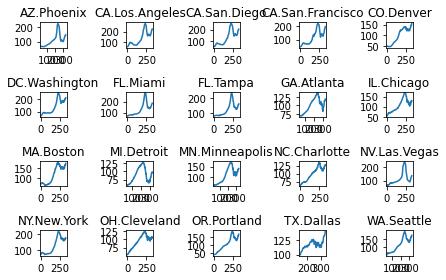

In [ ]:
# Read times
times=[]
with open('housing_prices_times.txt', 'r') as f:
    for row in f:
        times.append(row.strip())

# Plot data
for i in range(data.shape[0]):
    plt.subplot(4, 5, i+1)
    plt.title(loc[i])
    plt.plot(data[i,:])
plt.tight_layout()
plt.show()


In [ ]:


# Remove missing values using k-nearest neighbour imputer
imputer = KNNImputer(n_neighbors=2)
imp_data=imputer.fit_transform(data)

In [ ]:
#So now we see how the data is imputed

In [ ]:
data

array([[   nan,    nan,    nan, ..., 145.4 , 146.05, 146.9 ],
       [ 59.33,  59.65,  59.99, ..., 219.63, 221.94, 223.33],
       [ 54.67,  54.89,  55.16, ..., 200.72, 201.94, 203.32],
       ...,
       [ 41.05,  41.28,  41.06, ..., 165.2 , 167.09, 168.97],
       [   nan,    nan,    nan, ..., 136.73, 138.54, 140.12],
       [   nan,    nan,    nan, ..., 165.74, 168.1 , 169.96]])

In [ ]:
imp_data

array([[ 71.845,  72.48 ,  72.55 , ..., 145.4  , 146.05 , 146.9  ],
       [ 59.33 ,  59.65 ,  59.99 , ..., 219.63 , 221.94 , 223.33 ],
       [ 54.67 ,  54.89 ,  55.16 , ..., 200.72 , 201.94 , 203.32 ],
       ...,
       [ 41.05 ,  41.28 ,  41.06 , ..., 165.2  , 167.09 , 168.97 ],
       [ 56.795,  56.95 ,  57.16 , ..., 136.73 , 138.54 , 140.12 ],
       [ 55.545,  55.68 ,  55.53 , ..., 165.74 , 168.1  , 169.96 ]])

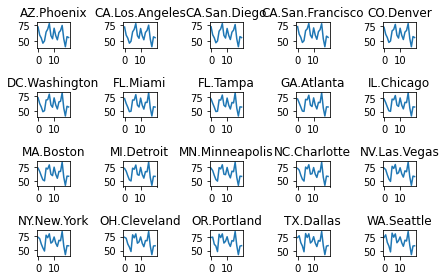

In [ ]:
# Plot imputed data
for i in range(imp_data.shape[0]):
    plt.subplot(4, 5, i+1)
    plt.title(loc[i])
    plt.plot(imp_data[:,i])
plt.tight_layout()
plt.show()

In [ ]:
#We can clearly see that the plots have changed significantly.

In [ ]:
# Compute ICA
ica = FastICA(n_components=4)
all_comps = ica.fit_transform(imp_data)


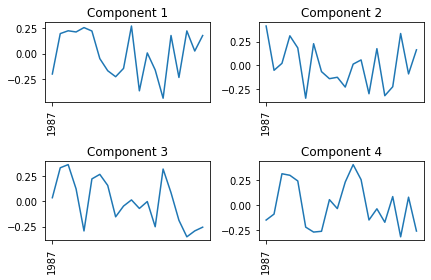

In [ ]:

# Plot components
for i in range(all_comps.shape[1]):
    ax = plt.subplot(2, 2, i+1)
    ax.set_xticks(np.arange(0,len(times),36))
    ax.set_xticklabels(np.arange(1987, 2015, 3), rotation='vertical')
    plt.title(f'Component {i+1}')
    plt.plot(all_comps[:,i])
plt.tight_layout()
plt.show()

In [ ]:
#From the data we can see that the cities can be classified into 4 different categories
# In the Component 1 type of cities we can see that the prices of houses show great abberation
# zig zag pattern . The rise in price of houses in each of the component can be seen from the year
# 2000 till 2006 and then sudden decline in prices since 2008 is observed in all components, 
# particularly in component 3 . Compoenent 1 houses still has their price rise in most parts though
# indicating the cities where investments can be highly profitable.

In [ ]:
# Compute ICA 8 components
ica = FastICA(n_components=8)
all_comps = ica.fit_transform(imp_data)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


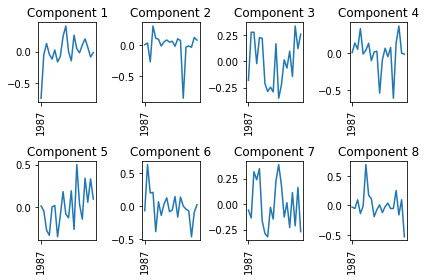

In [ ]:
 # Plot 8 components
for i in range(all_comps.shape[1]):
    ax = plt.subplot(2, 4, i+1)
    ax.set_xticks(np.arange(0,len(times),36))
    ax.set_xticklabels(np.arange(1987, 2015, 3), rotation='vertical')
    plt.title(f'Component {i+1}')
    plt.plot(all_comps[:,i])
plt.tight_layout()
plt.show()

In [ ]:
#Now we can see more components where the rise in price from 2000 to 2006 can be 
#observed and then subsequent crisis fall from 2008 onwards. Component 2 and 4 needs
# to have a flip in sign by multiplying by -1 in order to observe the results in 
# the expected way. 

In [ ]:
# To impute mean of columns, we use SimpleImputer
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imp_data = mean_imputer.fit_transform(data)

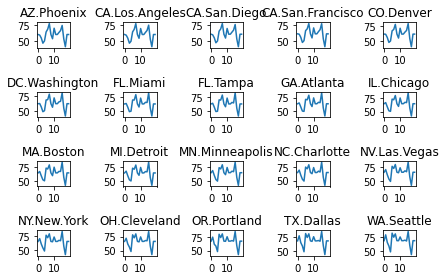

In [ ]:
# Plot imputed data
for i in range(mean_imp_data.shape[0]):
    plt.subplot(4, 5, i+1)
    plt.title(loc[i])
    plt.plot(mean_imp_data[:,i])
plt.tight_layout()
plt.show()

In [ ]:
# Compute ICA 8 components
ica = FastICA(n_components=8)
all_comps = ica.fit_transform(mean_imp_data)

In [ ]:
# Plot imputed data
for i in range(mean_imp_data.shape[0]):
    plt.subplot(4, 5, i+1)
    plt.title(loc[i])
    plt.plot(mean_imp_data[:,i])
plt.tight_layout()
plt.show()

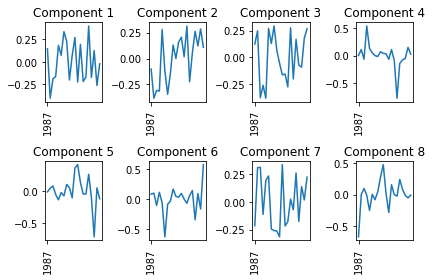

In [ ]:
# Plot 8 components
for i in range(all_comps.shape[1]):
    ax = plt.subplot(2, 4, i+1)
    ax.set_xticks(np.arange(0,len(times),36))
    ax.set_xticklabels(np.arange(1987, 2015, 3), rotation='vertical')
    plt.title(f'Component {i+1}')
    plt.plot(all_comps[:,i])
plt.tight_layout()
plt.show()

In [ ]:
#We see similar observation even with mean imputation, although, the drop in price
# is more prominent when we use k-nn. The ICA can help us see which components to invest in.

In [ ]:

tmp = np.genfromtxt('ratings.csv', delimiter=',', dtype='int32')
val = np.array(tmp[:,2]+1, dtype='float')/6
# ratings are from 0 to 5, but we can't have 0 entries, as they'd be confused
# with missing ratings.
data = coo_matrix( (val, (tmp[:,0]-1, tmp[:,1]-1)) )
# data is 1-indexed, so we need to reduce 1 to get it 0-indexed

tmp = np.genfromtxt('ratings_validation.csv', delimiter=',', dtype='int32')
val = np.array(tmp[:,2]+1, dtype='float')/6
validation = coo_matrix( (val, (tmp[:,0]-1, tmp[:,1]-1)) )

n = data.get_shape()[0]
m = data.get_shape()[1]
avg = data.sum()/data.count_nonzero()
print(f'Data has {n} rows and {m} columns')
print(f'Average rating is {avg:.4F}')

# Read movies
movies = []
with open('movies.txt') as f:
    for row in f:
        movies.append(row.strip())

# Compute just factors
res = sgd(data, 10, factor_learning_rate=0.001)
val_err = squared_error(validation, res.L, res.R)
print('Only factors, fixed rate, no regularization')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

# Plot errors over epocs
plt.plot(res.err)
plt.gca().set_yscale('log') # log scale makes these plots easier to read
plt.show()
plt.close()

# Print the top-10 and bottom-10 movies
print_factors(res.R, movies)

# Compute just factors, but use bold driver and slower learning
res = sgd(data, 10, bold_driver=2, factor_learning_rate=0.0001)
val_err = squared_error(validation, res.L, res.R)
print('Only factors, bold driver, no regularization')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

# Plot errors over epocs
plt.plot(res.err)
plt.gca().set_yscale('log') # log scale makes these plots easier to read
plt.show()
plt.close()

#####
## YOUR PART STARTS HERE
## Play around with different learning rates & bold driver multipliers
#####

#####
## YOUR PART ENDS HERE
#####

# Compute only bias; factor_learning_rate=None means don't compute factors 
res = sgd(data, 10, bold_driver=2, factor_learning_rate=None, bias_learning_rate=0.0001, verbose=False)
val_err = squared_error(validation, res.L, res.R, res.global_bias, res.row_bias, res.col_bias)
print('Bias only, no regularization')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')


# Compute factors and bias
res = sgd(data, 10, bold_driver=2, factor_learning_rate=0.0001, bias_learning_rate=0.0001, verbose=False)
val_err = squared_error(validation, res.L, res.R, res.global_bias, res.row_bias, res.col_bias)
print('Factors and bias, no regularization')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

# Print the movies based on their bias
print_factors(res.col_bias, movies)

# Add regularization
res = sgd(data, 10, bold_driver=2, factor_learning_rate=0.0001, bias_learning_rate=0.0001, factor_regu=0.001, bias_regu=0.001, verbose=False)
val_err = squared_error(validation, res.L, res.R, res.global_bias, res.row_bias, res.col_bias)
print('Factors and bias, regularized')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

# To be able to compute the SVD, you can convert the data into full array with
#data.toarray()
# To use squared_error(), you must multiply Sigma to U or V and use a transpose of V.
#####
## YOUR PART STARTS HERE
## Use the parameters from earlier and compare your errors (training and validation)
## to those you get with rank-10 truncated SVD
#####

#####
## YOUR PART ENDS HERE
#####

############
## TASK 2 ##
############

# Initial factors are given as a tuple (L, R); R is transposed
init_LR = (np.ones(shape=(n,10)), np.ones(shape=(m,10)))
# Initial biases are a tuple (global_bias, row_bias, col_bias
# Give the true global bias.
init_biases = (avg, np.ones(shape=n), np.ones(shape=m))

# You can change the learning rates and bold driver factor if you want
res = sgd(data, 10, bold_driver=2, factor_learning_rate=0.0001, bias_learning_rate=0.0001, verbose=True, init_LR=init_LR, init_biases=init_biases)
val_err = squared_error(validation, res=res)
print('Initial solutions as all-1s vectors')
print(f'Final training error = {res.err[-1]:5.3f}'
          f'\tRelative error = {res.err[-1]/squared_error(data)}')
print(f'    Validation error = {val_err:5.3f}'
          f'\tRelative error = {val_err/squared_error(validation)}')

#####
## YOUR PART STARTS HERE
## Try the other initial solutions
#####


#####
## YOUR PART ENDS HERE
#####


# try two different values for learning rates using 5-fold cross validation
learning_rates = [1e-5, 1e-3]
err = []
for rate in learning_rates:
    err.append( cv(data, folds=5, k=10, bold_driver=2, factor_learning_rate=rate, bias_learning_rate=rate, verbose=False) )
print('Rate\terr')
for i in range(len(learning_rates)):
    print(f'{learning_rates[i]}\t{err[i]}')

#####
## YOUR PART STARTS HERE
## Implement the grid search. After you've found the optimum combination of
## hyperparameters, run sgd with full training data using those parameters and
## compute the validation error.
#####


#####
## YOUR PART ENDS HERE
#####


############
## TASK 3 ##
############    

from sklearn.impute import KNNImputer
from sklearn.decomposition import FastICA

# Read data
data = np.genfromtxt('housing_prices.csv', delimiter=',', skip_header=1, missing_values="NA", filling_values=np.nan)
# Read locations
loc=[]
with open('housing_prices_locations.txt', 'r') as f:
    for row in f:
        loc.append(row.strip())
# Read times
times=[]
with open('housing_prices_times.txt', 'r') as f:
    for row in f:
        times.append(row.strip())

# Plot data
for i in range(data.shape[0]):
    plt.subplot(4, 5, i+1)
    plt.title(loc[i])
    plt.plot(data[i,:])
plt.tight_layout()
plt.show()

# We'd like to have cities as columns and time stamps as rows, so transpose
data = data.T

# Remove missing values using k-nearest neighbour imputer
imputer = KNNImputer(n_neighbors=2)
imp_data=imputer.fit_transform(data)

#Plot data again

# Compute ICA
ica = FastICA(n_components=4)
all_comps = ica.fit_transform(imp_data)

# Plot components
for i in range(all_comps.shape[1]):
    ax = plt.subplot(2, 2, i+1)
    ax.set_xticks(np.arange(0,len(times),36))
    ax.set_xticklabels(np.arange(1987, 2015, 3), rotation='vertical')
    plt.title(f'Component {i+1}')
    plt.plot(all_comps[:,i])
plt.tight_layout()
plt.show()

# To impute mean of columns, we use SimpleImputer
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imp_data = mean_imputer.fit_transform(data)

#####
## YOUR PART STARTS HERE
## Do further analysis
#####


#####
## YOUR PART ENDS HERE
#####
